In [2]:
import pandas as pd

In [3]:
import random
import numpy as np

# set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [4]:
# Target id
target_id = "CHEMBL2760"

In [5]:
from loader.load_chembl import parse_activities
# Load the data
target_raw = parse_activities(target_id=target_id)

In [10]:
target_raw.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,188231,[],CHEMBL644937,Inhibitory activity against Acid sphingomyelinase,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Sphingomyelin phosphodiesterase,9606,NaN,NaN,IC50,ug ml-1,UO_0000274,NaN,5.25
1,NaN,NaN,194117,[],CHEMBL644937,Inhibitory activity against Acid sphingomyelinase,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Sphingomyelin phosphodiesterase,9606,NaN,NaN,IC50,ug ml-1,UO_0000274,NaN,24.00
2,NaN,NaN,206131,[],CHEMBL644937,Inhibitory activity against Acid sphingomyelinase,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Sphingomyelin phosphodiesterase,9606,NaN,NaN,IC50,ug ml-1,UO_0000274,NaN,5.30
3,NaN,NaN,206133,[],CHEMBL644937,Inhibitory activity against Acid sphingomyelinase,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Sphingomyelin phosphodiesterase,9606,NaN,NaN,IC50,ug ml-1,UO_0000274,NaN,5.15
4,NaN,NaN,210721,[],CHEMBL644937,Inhibitory activity against Acid sphingomyelinase,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Sphingomyelin phosphodiesterase,9606,NaN,NaN,IC50,ug ml-1,UO_0000274,NaN,34.50


In [11]:
from loader.clean_chembl import clean_data
# Clean the data
target_clean = clean_data(target_id=target_id, rewrite=False)

In [12]:
target_clean.head()

,canonical_smiles,standard_value
molecule_chembl_id,,
CHEMBL323197,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,14100.0
CHEMBL4167681,CCCCCCCCCCOc1cc(C(=O)NO)ccc1OC,890.0
CHEMBL320658,COc1c(O)cc(O)c(C(=O)c2c(O)cc(O)cc2O)c1CC=C(C)C,14700.0
CHEMBL109045,COc1cc(C(=O)c2c(O)cc(O)c(CC=C(C)C)c2O)c(O)cc1O,66000.0
CHEMBL4464068,CCCCCCCCCCOc1cc(C(=O)NO)on1,360.0


In [13]:
from predictor.descriptor_computer import get_desc_dataset

rdkit_desc = get_desc_dataset(target_id, "rdkit")
rdkit_desc.head()

,smiles,standard_value,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL323197,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,14100.0,13.480485,13.480485,0.010510,-0.446615,0.400171,10.966667,410.466,384.258,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4167681,CCCCCCCCCCOc1cc(C(=O)NO)ccc1OC,890.0,11.430997,11.430997,0.332615,-0.565202,0.341103,10.391304,323.433,294.201,...,0,0,0,0,0,0,0,0,7,0
CHEMBL320658,COc1c(O)cc(O)c(C(=O)c2c(O)cc(O)cc2O)c1CC=C(C)C,14700.0,12.945543,12.945543,0.001304,-0.881522,0.409566,10.423077,360.362,340.202,...,0,0,0,0,0,0,0,0,0,0
CHEMBL109045,COc1cc(C(=O)c2c(O)cc(O)c(CC=C(C)C)c2O)c(O)cc1O,66000.0,12.775670,12.775670,0.061414,-0.894213,0.409566,10.423077,360.362,340.202,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4464068,CCCCCCCCCCOc1cc(C(=O)NO)on1,360.0,10.999545,10.999545,0.070904,-0.736640,0.369750,10.500000,284.356,260.164,...,0,0,0,0,0,0,0,0,7,0


In [14]:
from predictor.descriptor_computer import get_desc_dataset

mordred_desc = get_desc_dataset(target_id, "mordred")
mordred_desc.head()

D:\python_projects\alzheimer-generative-design\venv\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

KeyboardInterrupt



In [14]:
from predictor.fingerprint_computer import get_fp_dataset
from rdkit.Chem import rdFingerprintGenerator

fp_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=2048)
morgan_desc = get_fp_dataset(target_id, "morgan", fp_gen)
morgan_desc.head()

,smiles,standard_value,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL323197,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,14100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHEMBL4167681,CCCCCCCCCCOc1cc(C(=O)NO)ccc1OC,890.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHEMBL320658,COc1c(O)cc(O)c(C(=O)c2c(O)cc(O)cc2O)c1CC=C(C)C,14700.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHEMBL109045,COc1cc(C(=O)c2c(O)cc(O)c(CC=C(C)C)c2O)c(O)cc1O,66000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CHEMBL4464068,CCCCCCCCCCOc1cc(C(=O)NO)on1,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Predicting with rdkit descriptors

In [15]:
x_rdkit_desc = rdkit_desc.drop(columns=["smiles", "standard_value"])

In [26]:
x_rdkit_desc.head()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
molecule_chembl_id,,,,,,,,,,,,,,,,,,,,,
CHEMBL323197,13.480485,13.480485,0.010510,-0.446615,0.400171,10.966667,410.466,384.258,410.172939,158,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4167681,11.430997,11.430997,0.332615,-0.565202,0.341103,10.391304,323.433,294.201,323.209658,130,...,0,0,0,0,0,0,0,0,7,0
CHEMBL320658,12.945543,12.945543,0.001304,-0.881522,0.409566,10.423077,360.362,340.202,360.120903,138,...,0,0,0,0,0,0,0,0,0,0
CHEMBL109045,12.775670,12.775670,0.061414,-0.894213,0.409566,10.423077,360.362,340.202,360.120903,138,...,0,0,0,0,0,0,0,0,0,0
CHEMBL4464068,10.999545,10.999545,0.070904,-0.736640,0.369750,10.500000,284.356,260.164,284.173607,114,...,0,0,0,0,0,0,0,0,7,0


In [6]:
import numpy as np
target_clean = pd.read_csv('data\CHEMBL2760_clean.csv')
y10 = -np.log10(target_clean["standard_value"])

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\belev\AppData\Local\Temp\ipykernel_17568\1478749797.py:2: SyntaxWarning: invalid escape sequence '\C'
  target_clean = pd.read_csv('data\CHEMBL2760_clean.csv')


In [7]:
from sklearn.model_selection import KFold

n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)
scoring = ['r2', 'neg_mean_absolute_error', 'neg_root_mean_squared_error']
results_path = 'results.csv'

In [ ]:
x_rdkit_desc.drop("numpy", axis=1, inplace=True)

In [49]:
### Open files
x_rdkit_desc = pd.read_csv("data\CHEMBL2760_morgan_fp.csv").drop(columns=["molecule_chembl_id", "smiles", "standard_value"])

import numpy as np
target_clean = pd.read_csv('data\CHEMBL2760_clean.csv')
y10 = -np.log10(target_clean["standard_value"])

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:5: SyntaxWarning: invalid escape sequence '\C'
C:\Users\belev\AppData\Local\Temp\ipykernel_17568\1188556685.py:2: SyntaxWarning: invalid escape sequence '\C'
  x_rdkit_desc = pd.read_csv("data\CHEMBL2760_morgan_fp.csv").drop(columns=["molecule_chembl_id", "smiles", "standard_value"])
C:\Users\belev\AppData\Local\Temp\ipykernel_17568\1188556685.py:5: SyntaxWarning: invalid escape sequence '\C'
  target_clean = pd.read_csv('data\CHEMBL2760_clean.csv')


Cross-validation mean scores:
  r2, mean: 0.5312, std: 0.1273
  neg_mean_absolute_error, mean: -0.4353, std: 0.0663
  neg_root_mean_squared_error, mean: -0.5622, std: 0.0776


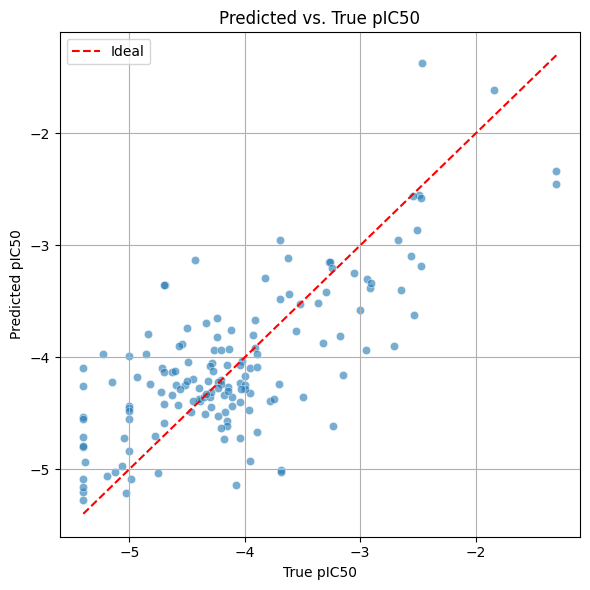

Duplicate experiment (same preprocessing + model config). Skipping.


In [50]:
# try models
from sklearn.preprocessing import StandardScaler
from predictor.pipeline import run_pipeline
# Модели из scikit-learn
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Модели из внешних библиотек
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# baseline: RFRegressor
pipeline = run_pipeline(
    X=x_rdkit_desc,
    y=y10.squeeze(),
    cv=cv,
    model=CatBoostRegressor(verbose=0, random_state=SEED),
    scaler=StandardScaler(),
    scoring=scoring,
    results_path=results_path,
)

In [51]:
# Optimise params
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from predictor.pipeline import get_preprocessing_pipeline

def tune_model_params(X, y, cv, selector=None, scaler=None, dim_reducer=None):
    preprocessing = get_preprocessing_pipeline(
        selector=selector,
        scaler=scaler,
        dim_reducer=dim_reducer
    )

    full_pipeline = Pipeline([
        ('preprocessing', preprocessing),
        ('model', CatBoostRegressor(verbose=0, random_state=42))
    ])

    param_grid = {
        'model__depth': [4, 6, 8],
        'model__learning_rate': [0.01, 0.05, 0.1],
        'model__l2_leaf_reg': [1, 3, 5],
        'model__iterations': [500]
    }

    grid_search = GridSearchCV(
        estimator=full_pipeline,
        param_grid=param_grid,
        cv=cv,
        scoring='r2',
        n_jobs=-1
    )

    grid_search.fit(X, y)
    print("Лучшие параметры:", grid_search.best_params_)
    print("R2 score (CV):", grid_search.best_score_)

    return grid_search.best_estimator_

Лучшие параметры: {'model__depth': 8, 'model__iterations': 500, 'model__l2_leaf_reg': 3, 'model__learning_rate': 0.1}
R2 score (CV): 0.5413574609977745
Cross-validation mean scores:
  r2, mean: 0.5414, std: 0.1099
  neg_mean_absolute_error, mean: -0.4278, std: 0.0622
  neg_root_mean_squared_error, mean: -0.5564, std: 0.0651


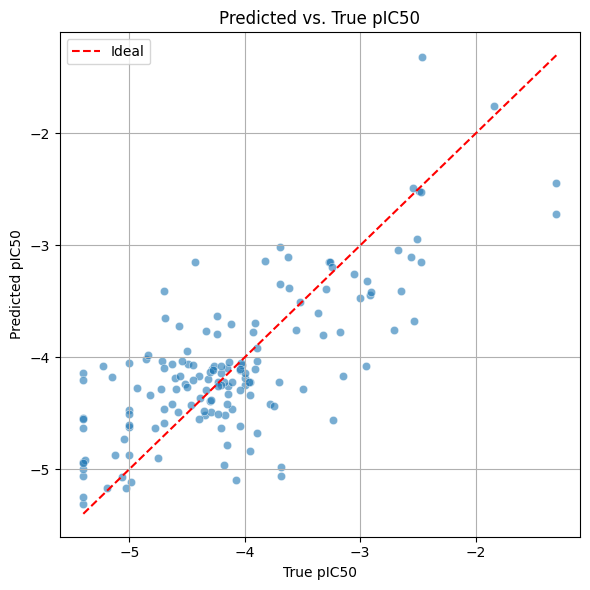

Duplicate experiment (same preprocessing + model config). Skipping.


In [52]:

from predictor.pipeline import get_preprocessing_pipeline
# 1. Подбор лучших параметров
best_model_pipeline = tune_model_params(
    X=x_rdkit_desc,
    y=y10.squeeze(),
    cv=cv,
    scaler=StandardScaler()  # Или другие preprocessing шаги
)

# 2. Извлеки готовую модель
best_model = best_model_pipeline.named_steps['model']

# 3. Запусти эксперимент с лучшей моделью
final_pipeline = run_pipeline(
    X=x_rdkit_desc,
    y=y10.squeeze(),
    cv=cv,
    model=best_model,
    scaler=StandardScaler(),  # те же preprocessing шаги
    scoring=scoring,
    results_path=results_path
)